<a href="https://colab.research.google.com/github/masataka715/jupyter_notebook_playground/blob/master/%E6%89%8B%E6%9B%B8%E3%81%8D%E6%96%87%E5%AD%97%E8%AA%8D%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
# GPU が使用可能であることを確認
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8883611154209447218
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12623892355720314942
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4770010552395905779
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13756937997927601261
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


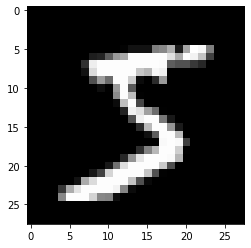

In [ ]:
from tensorflow.keras.datasets import mnist
# データセットの取得
train, test = mnist.load_data()
img = train[0][0]
plt.imshow(img, cmap='gray');

In [ ]:
# 画像データの形を (height, width) から (height, width, channel) (TensorFlow で使用できる形式)へと変換
x_train = train[0].reshape(60000, 28, 28, 1) / 255
x_test = test[0].reshape(10000, 28, 28, 1) / 255
# 目標値
t_train = train[1]
t_test = test[1]
# 入力値は float32 のデータ型に、目標値は int32 のデータ型に変換
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# ここからモデルの定義
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras import models,layers

# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    # 特徴量抽出
    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    # ベクトル化
    layers.Flatten(),
    # 識別
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 507)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               50800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 51,840
Trainable params: 51,840
Non-trainable params: 0
_________________________________________________________________


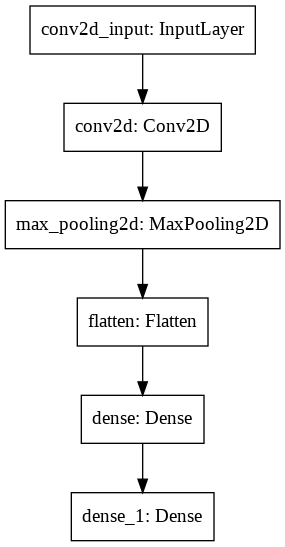

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)
# モデルのコンパイル
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# 学習の実行
# fixメソッドでモデルに学習させる（出力と教師データの差が小さくなるように各ニューロンの重みを更新し、モデルの予測精度を向上させる）
# モデルを訓練することで、重みが自動的にチューニングされる
# verbose:１を指定した場合は学習の進捗度合いを出力
# epochs:同じデータセットで行う学習の回数
batch_size = 4096
epochs = 30
history = model.fit(x_train, t_train, 
                batch_size=batch_size, 
                epochs=epochs, verbose=1, 
                validation_data=(x_test, t_test))

Epoch 1/30
15/15 [==============================] - 0s 29ms/step - loss: 0.8988 - accuracy: 0.7390 - val_loss: 0.3954 - val_accuracy: 0.8911
Epoch 2/30
15/15 [==============================] - 0s 15ms/step - loss: 0.3349 - accuracy: 0.9030 - val_loss: 0.2814 - val_accuracy: 0.9166
Epoch 3/30
15/15 [==============================] - 0s 15ms/step - loss: 0.2482 - accuracy: 0.9260 - val_loss: 0.2085 - val_accuracy: 0.9362
Epoch 4/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1983 - accuracy: 0.9413 - val_loss: 0.1793 - val_accuracy: 0.9431
Epoch 5/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1636 - accuracy: 0.9510 - val_loss: 0.1538 - val_accuracy: 0.9532
Epoch 6/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1396 - accuracy: 0.9578 - val_loss: 0.1283 - val_accuracy: 0.9610
Epoch 7/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1211 - accuracy: 0.9635 - val_loss: 0.1179 - val_accuracy: 0.9649
Epoch 8/30
15

In [ ]:
!nvidia-smi
# Memory-Usage 1173MiB / 15079MiB →　メモリを可能な限り使用できるようにバッチサイズを調整する

Wed Oct 28 02:16:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |   1173MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
27,0.023280,0.992767,0.070760,0.9790
28,0.023497,0.992633,0.075062,0.9785
29,0.024089,0.992200,0.069050,0.9809


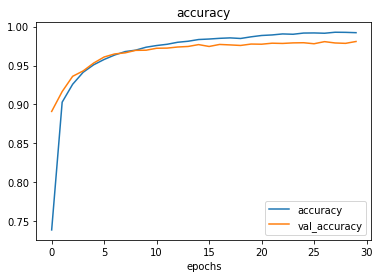

In [ ]:
results[['accuracy', 'val_accuracy']].plot(title='accuracy')
plt.xlabel('epochs');